In [1]:
# loading required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# uploading data form csv file
file_path = "..."  
df = pd.read_csv(file_path)

In [5]:
print(df.head())

   PetID PetType             Breed  AgeMonths   Color    Size   WeightKg  \
0    500    Bird          Parakeet        131  Orange   Large   5.039768   
1    501  Rabbit            Rabbit         73   White   Large  16.086727   
2    502     Dog  Golden Retriever        136  Orange  Medium   2.076286   
3    503    Bird          Parakeet         97   White   Small   3.339423   
4    504  Rabbit            Rabbit        123    Gray   Large  20.498100   

   Vaccinated  HealthCondition  TimeInShelterDays  AdoptionFee  PreviousOwner  \
0           1                0                 27          140              0   
1           0                0                  8          235              0   
2           0                0                 85          385              0   
3           0                0                 61          217              1   
4           0                0                 28           14              1   

   AdoptionLikelihood  
0                   0  
1       

In [7]:
# division into featrues (X) and label (y)
# the last column is a label (target) -> adoption_likelihood
X = df.iloc[:, 1:-1]  # all columns regardless of the first one and the last one
y = df.iloc[:, -1]   # last column

In [9]:
# checking data types of variables
df.dtypes

PetID                   int64
PetType                object
Breed                  object
AgeMonths               int64
Color                  object
Size                   object
WeightKg              float64
Vaccinated              int64
HealthCondition         int64
TimeInShelterDays       int64
AdoptionFee             int64
PreviousOwner           int64
AdoptionLikelihood      int64
dtype: object

In [11]:
# excluding categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
print('Categorical columns:')
print(categorical_columns)

Categorical columns:
Index(['PetType', 'Breed', 'Color', 'Size'], dtype='object')


In [13]:
# encoding categorical variables (one-hot encoding)
X = pd.get_dummies(X, drop_first=False).astype(int)

In [15]:
# division into training and test sets
# (80% into training set and 20% into test set)
# random_state is used for setting seed 
# (to always with every run of the code gain the same division of the sets)
# why use random state?
# 1) reproducibility of resultes
# 2) more meaningful comparrability of models
# 3) avoiding differences in spliting sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print('Training set: ', X_train)
print('Test set: ', X_test)

Training set:        AgeMonths  WeightKg  Vaccinated  HealthCondition  TimeInShelterDays  \
916          68        15           1                0                 74   
261         172        24           0                0                 44   
607         169        10           0                0                 43   
1331        135         2           0                1                 50   
240         169        26           1                0                 73   
...         ...       ...         ...              ...                ...   
1130        165        22           1                0                 49   
1294         81         8           1                0                 72   
860          19        28           1                0                 31   
1459        155        13           1                0                 87   
1126         34         9           0                0                 83   

      AdoptionFee  PreviousOwner  PetType_Bird  PetType_Cat 

In [17]:
# creating and training a decision tree model

# 1) creating classifier
# with fixed max depth to prevent overfitting
# criterion = 'gini' - use of Gini to split nodes - default parameter
# splitter = 'best' - best division in every node - default parameter
clf = DecisionTreeClassifier(max_depth = 3, random_state = 42, criterion = 'gini', splitter = 'best')

# 2) model training 
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [21]:
# predicting y on test set
y_pred = clf.predict(X_test)
print('Predicted adoption: ', y_pred)

Predicted adoption:  [1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1
 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0
 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 0 1 1
 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0
 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0
 1 1 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1
 0 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 0
 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0
 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0]


In [23]:
# model validation 
accuracy = accuracy_score(y_test, y_pred)
print(f'Model accuracy: {accuracy:.2f}')

Model accuracy: 0.91


In [25]:
# result interpretation:
# model accuracy: 0.91 means that model correctly predicted 91% cases

In [27]:
# confusion matrix 
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', cm)

Confusion matrix:
 [[248  22]
 [ 14 118]]


In [29]:
# results interpretation 
# top left corner - TRUE NEGATIVE - correctly 0 predicted
# top right corner - FALSE POSITIVE - uncorrectly 1 predicted - 0 in reality
# bottom left corner - FALSE NEGATIVE - uncorrectly 0 predicted - 1 in reality
# bottom right corner - TRUE POSITIVE - correctly 1 predicted 

# 248 + 118 = 366 - correctly predicted
# 22 + 14 = 36 - uncorrectly predicted

In [31]:
# three methods to count the number of correct predictions:

# 1) directly from confusion matrix
correct_predictions_1 = cm[0, 0] + cm[1, 1]
print('Number of correct predictions: ', correct_predictions_1)

# 2) by comparison of y_test and y_pred
correct_predictions_2 = sum(y_test == y_pred)
print('Number of correct predictions: ', correct_predictions_2)

# 3) by using accuracy score 
correct_predictions_3 = accuracy * len(y_test)
print('Number of correct predictions: ', int(correct_predictions_3))

Number of correct predictions:  366
Number of correct predictions:  366
Number of correct predictions:  366


In [33]:
# further model evaluation
scores = classification_report(y_test, y_pred)
print(scores)

              precision    recall  f1-score   support

           0       0.95      0.92      0.93       270
           1       0.84      0.89      0.87       132

    accuracy                           0.91       402
   macro avg       0.89      0.91      0.90       402
weighted avg       0.91      0.91      0.91       402



In [35]:
# results interpretation 
# precision - what % of animals that the model predicted to be adopted ware actually adopted
# 95% of predicted non-adoptions were correct
# 84% of predicted adoptions were correct
# --> model more precisely predicted non-adoptions

# recall - what % of actually adopted animals the moodel correctly detected
# 92% of real non-adoptions were correctly detected
# 89% of real adoption were correctly detected
# --> model is more sensitive in detection non-adoptions

# f1 - score - the harmonic average of precision and recall (overall indicator)

# macro avg - cummulative score regardless of number of obseravtion in each class
# weighted avg - cummulative score, taking into account class size

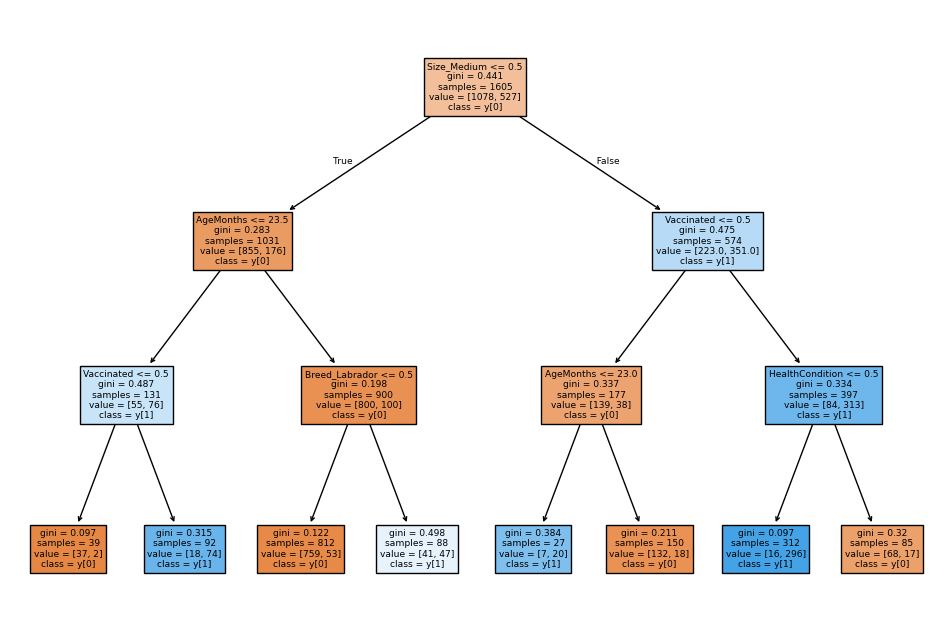

In [37]:
# decision tree model visualisation
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names = X.columns, class_names = bool(set(y)), filled = True)
plt.show()

In [39]:
# Interpretation:
# most beneficial path to be adopted:
# size_medium > 0.5 --> vaccinated > 0.5 --> healthcondition <= 0.5 
# so animals in medium size which were vaccinated and do not have any health conditions are most likely to be adopted

# most harmful / least beneficial path to be adopted:
# size_medium <= 0.5 --> age_months> 23.5 --> breed_labrador <= 0.5
# so animals not in medium size which are older than 23.5 moths and which are not a labrador are lest likely to be adopted

In [41]:
# Gini
# 1) The lower the Gini value at a given node, the better the partitioning. 
# The decision tree tries to choose attributes and threshold values that minimize the Gini at each node so that the data is best divided.
# 2) The Gini value at each node in the tree provides an assessment of how well a node splits the data. 
# If the Gini value is low, it means that the node classifies the data well. 
# The tree strives to keep the Gini value at the final nodes (leaves) as low as possible, as this means that all samples at that node belong to one class.